# Stage 02 - Data Pre-Processing

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

# Load Dataset

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_excel('/content/gdrive/MyDrive/E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
# Pisahkan Categorical & Numerical

cats = []
nums = []

for i in df.columns:
  if df[i].dtype == 'object':
    cats.append(i)
  else:
    nums.append(i)

print('Categorical =', cats)
print('Numerical =', nums)

Categorical = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
Numerical = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


# Handling Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [5]:
for i in df.columns:
    percent = round(df[i].isna().sum()*100/len(df[i]),2)
    print(f'''Kolom {i}:''')
    print('Missing values :',df[i].isna().sum(),'dari ',len(df))
    print(f'''Presentase missing value:''',percent, '%')
    print('---'*10)

Kolom CustomerID:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom Churn:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom Tenure:
Missing values : 264 dari  5630
Presentase missing value: 4.69 %
------------------------------
Kolom PreferredLoginDevice:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom CityTier:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom WarehouseToHome:
Missing values : 251 dari  5630
Presentase missing value: 4.46 %
------------------------------
Kolom PreferredPaymentMode:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom Gender:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom HourSpendOnApp:
Missing values : 255 dari  5630
Presentase missing value: 4.53 %
---------

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [6]:
df2 = df.copy() #Mencopy dataframe

In [7]:
#Mengganti Phone -> Mobile Phone untuk menghilangkan redundansi data
df2['PreferredLoginDevice'] = df2['PreferredLoginDevice'].replace({'Phone' : 'Mobile Phone'})

In [8]:
# Mengganti CC -> Credit Card & Cash on Delivery -> COD untuk menghilangkan redundansi data
df2['PreferredPaymentMode'] = df2['PreferredPaymentMode'].replace({'CC' : 'Credit Card', 'Cash on Delivery' : 'COD'})

## Imputasi data menggunakan perintah fillna
- Tenure -> median
- WarehouseToHome -> median
- HourSpendOnApp -> median
- OrderAmountHikeFromlastYear -> median
- CouponUsed -> median
- OrderCount -> median
- DaySinceLastOrder -> median
> Alasan mengganti value menggunakan median dikarenakan nilai mean dan median tidak timpang jauh sehingga nilai median dipilih karena bernilai absolut.

In [9]:
df2['Tenure'].fillna(df2['Tenure'].median(), inplace=True)
df2['WarehouseToHome'].fillna(df2['WarehouseToHome'].median(), inplace=True)
df2['HourSpendOnApp'].fillna(df2['HourSpendOnApp'].median(), inplace=True)
df2['OrderAmountHikeFromlastYear'].fillna(df2['OrderAmountHikeFromlastYear'].median(), inplace=True)
df2['CouponUsed'].fillna(df2['CouponUsed'].median(), inplace=True)
df2['OrderCount'].fillna(df2['OrderCount'].median(), inplace=True)
df2['DaySinceLastOrder'].fillna(df2['DaySinceLastOrder'].median(), inplace=True)

In [10]:
# Mengecek kembali apakah imputasi data sudah berhasil
df2.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [11]:
# Melihat value count variabel numerical
for col in nums:
    percent = round(df2[col].value_counts()*100/len(df2[col]),2)
    print(f'''Value count kolom {col}:''')
    print(df2[col].value_counts())
    print('')
    print('Presentase :\n',percent)
    print('---'*10)
    print()

Value count kolom CustomerID:
50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: CustomerID, Length: 5630, dtype: int64

Presentase :
 50001    0.02
53751    0.02
53759    0.02
53758    0.02
53757    0.02
         ... 
51876    0.02
51875    0.02
51874    0.02
51873    0.02
55630    0.02
Name: CustomerID, Length: 5630, dtype: float64
------------------------------

Value count kolom Churn:
0    4682
1     948
Name: Churn, dtype: int64

Presentase :
 0    83.16
1    16.84
Name: Churn, dtype: float64
------------------------------

Value count kolom Tenure:
1.0     690
9.0     511
0.0     508
8.0     263
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29

In [12]:
# Melihat value count variable categorical
for col in cats:
    percent = round(df2[col].value_counts()*100/len(df2[col]),2)
    print(f'''Value count kolom {col}:''')
    print(df2[col].value_counts())
    print('')
    print('Presentase :\n',percent)
    print('---'*10)
    print()

Value count kolom PreferredLoginDevice:
Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

Presentase :
 Mobile Phone    70.98
Computer        29.02
Name: PreferredLoginDevice, dtype: float64
------------------------------

Value count kolom PreferredPaymentMode:
Debit Card     2314
Credit Card    1774
E wallet        614
COD             514
UPI             414
Name: PreferredPaymentMode, dtype: int64

Presentase :
 Debit Card     41.10
Credit Card    31.51
E wallet       10.91
COD             9.13
UPI             7.35
Name: PreferredPaymentMode, dtype: float64
------------------------------

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Presentase :
 Male      60.11
Female    39.89
Name: Gender, dtype: float64
------------------------------

Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Other

# Statistical Summary

## Statistical analysis setelah imputasi data
- Univariate Analysis (Boxplot) setelah imputasi data
- Multivariate Analysis (Pairplot KDE) setelah imputasi data
- Multivariate Analysis (Heatmap) setelah imputasi data
> Melakukan visualisasi data setelah melakukan proses imputasi data untuk handling missing values untuk membandingkan dengan visualisasi data pada stage sebelumnya dan juga untuk mencari data-data yang perlu dilakukan treatment lebih lanjut. 

### Univariate Analysis

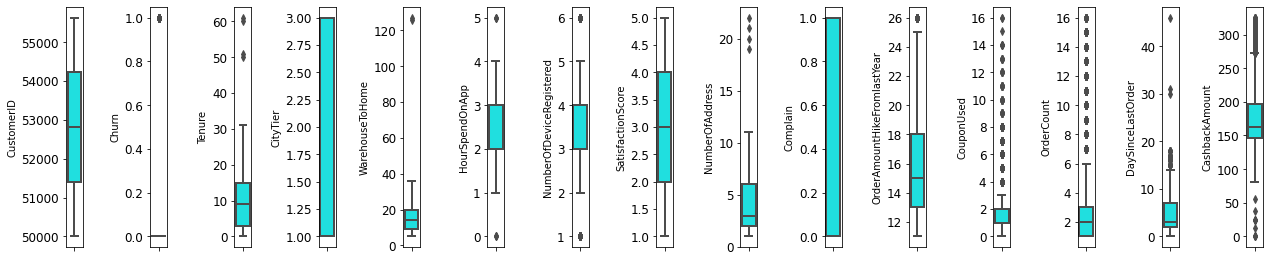

In [ ]:
# Membuat diagram boxplot
plt.figure(figsize=(18,4))

for i in range (0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df2[nums[i]], color='cyan', orient='v')
    plt.tight_layout(pad = 2)

### Multivariate Analysis

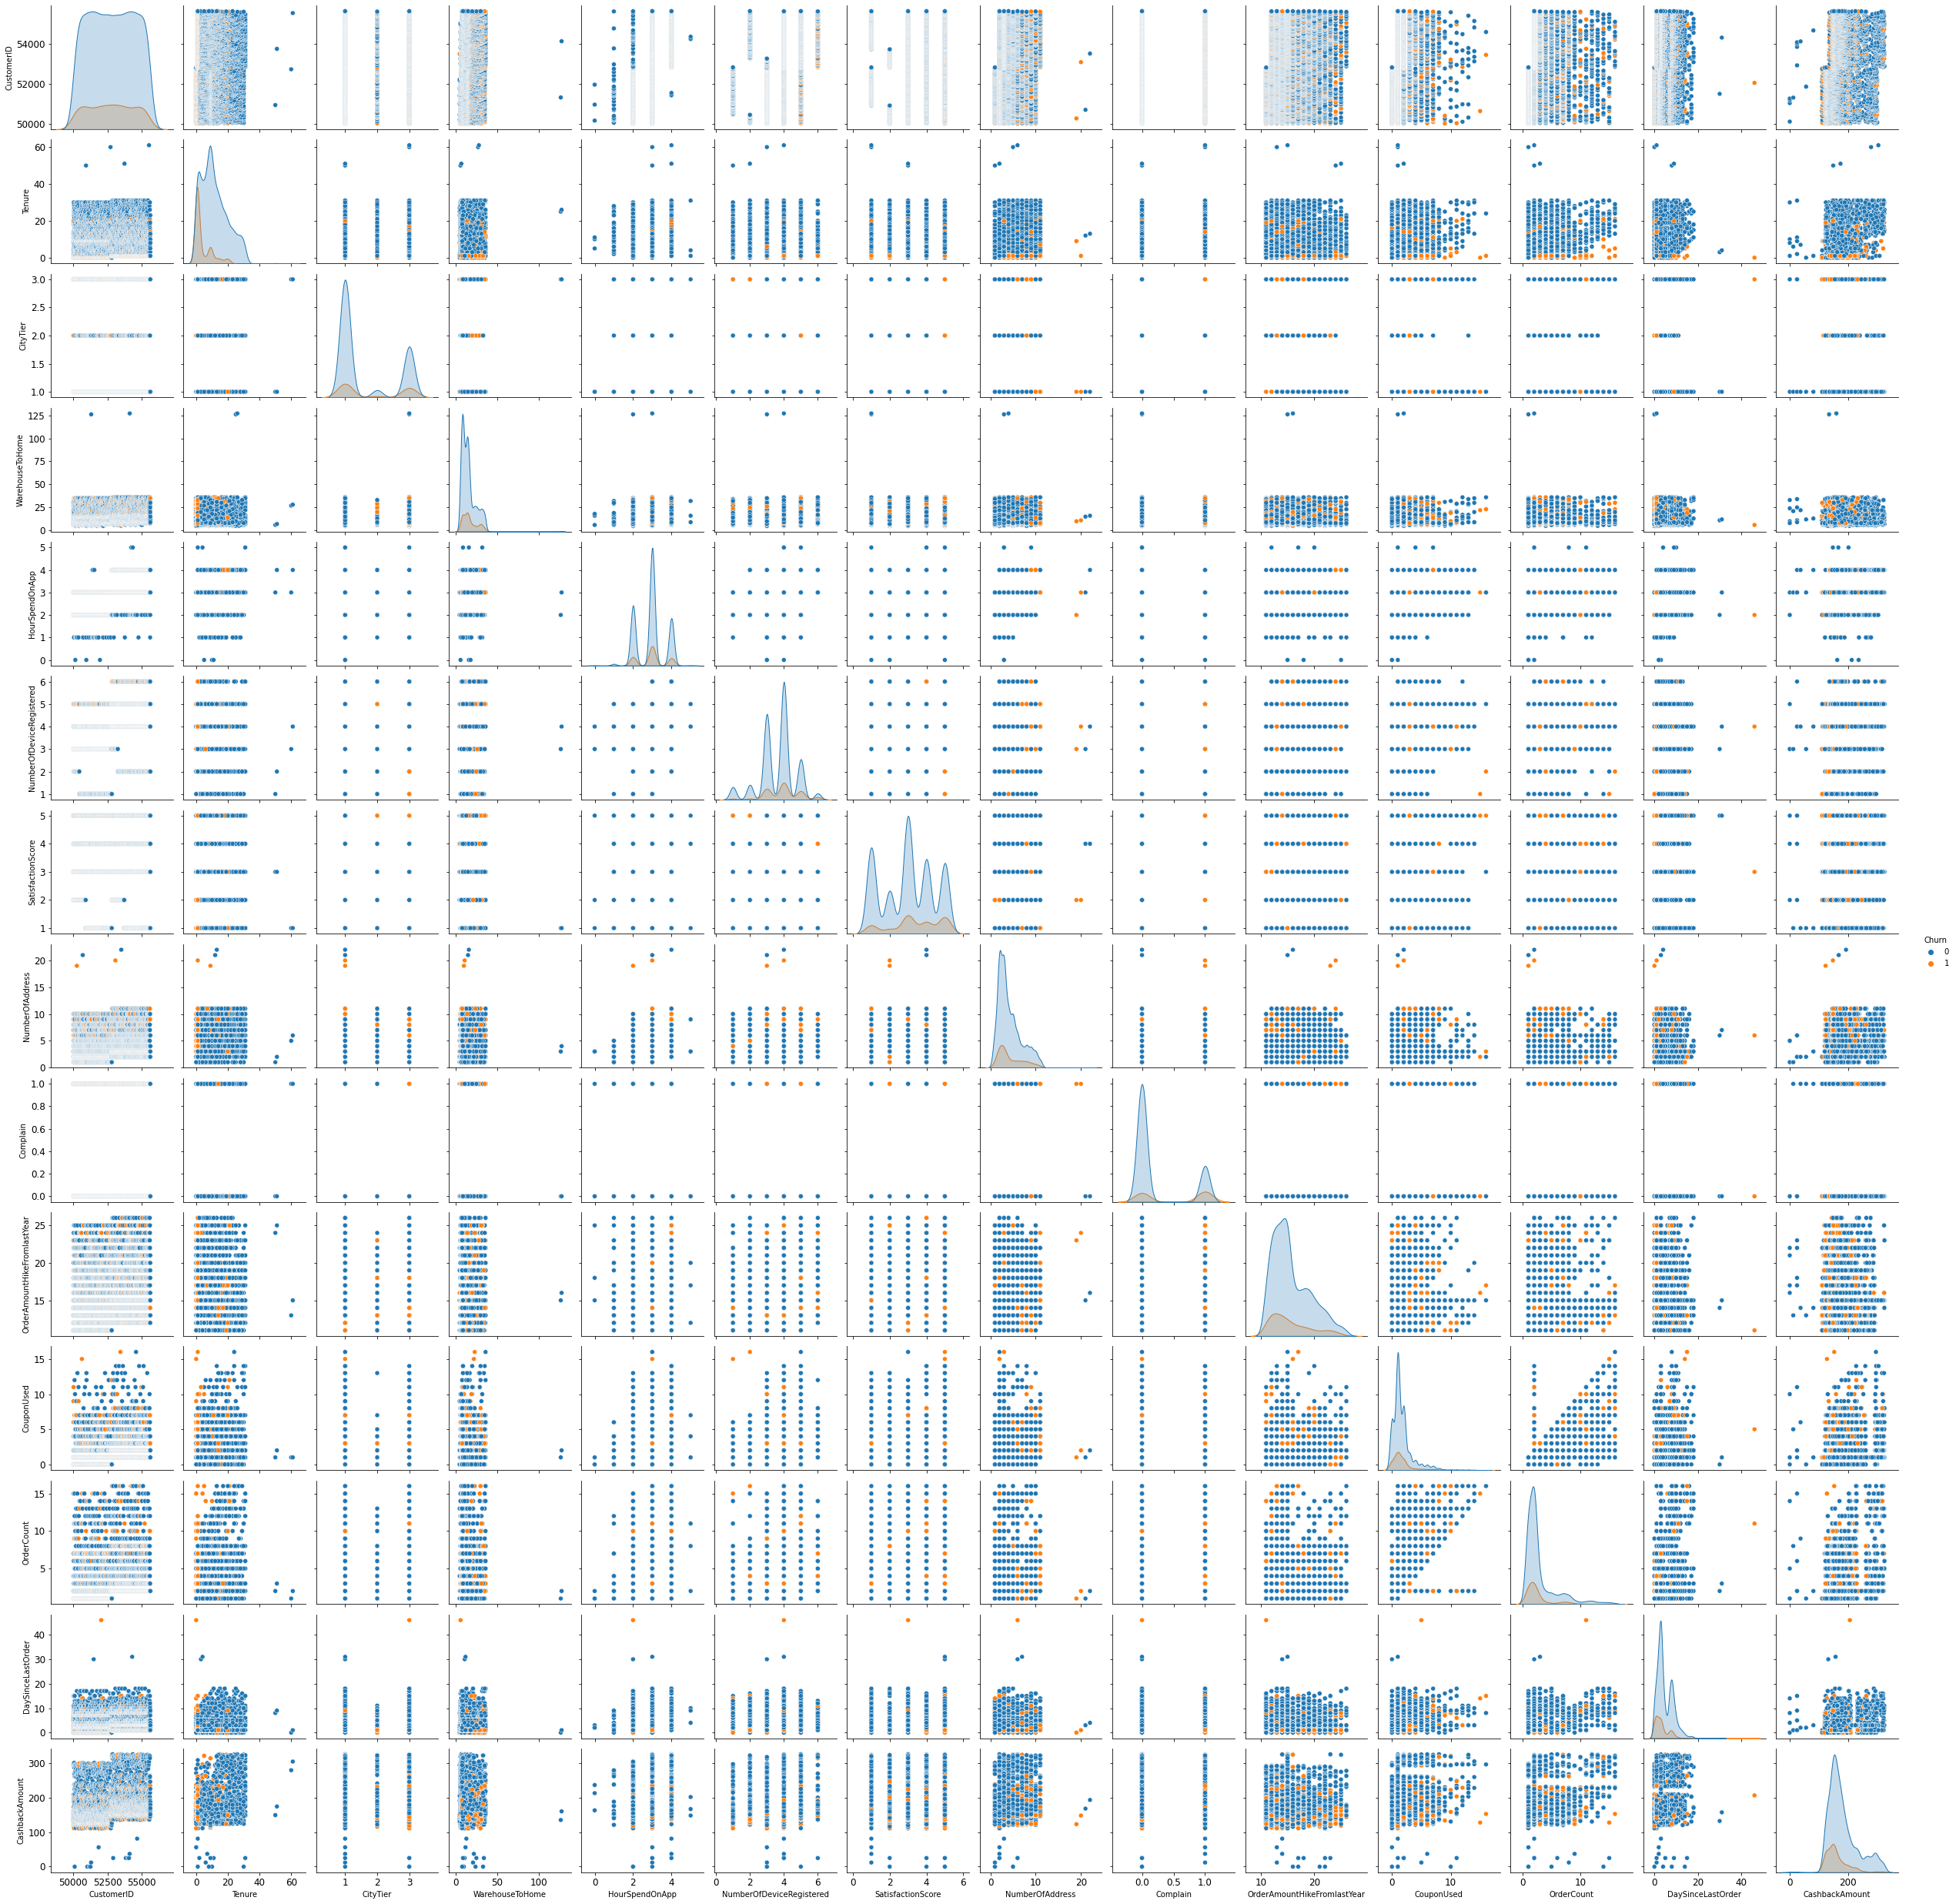

In [ ]:
# Pair Plots (Numeric)
sns.pairplot(df2, diag_kind='kde', hue='Churn')

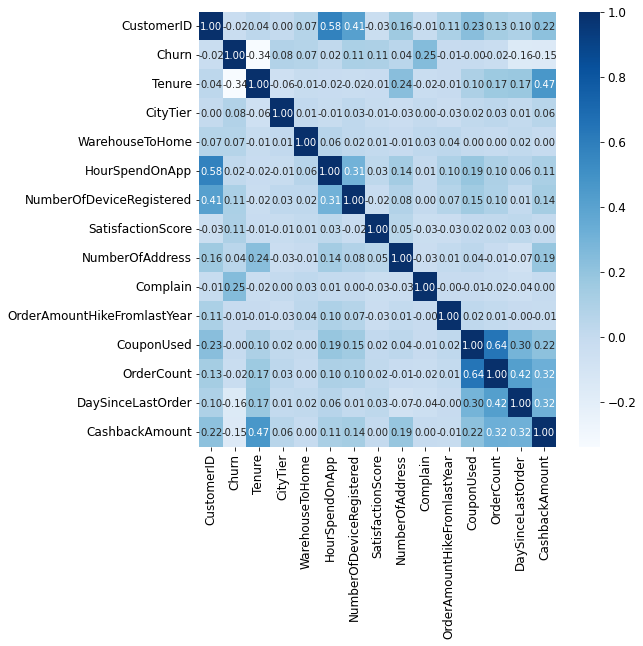

In [ ]:
# Correlation Heatmap (Numeric)
plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(), cmap='Blues', annot=True, fmt='.2f')

# Handling Duplicated Data

In [13]:
df2.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [14]:
df2.duplicated().sum()

0

tidak ada data duplikasi

# Outlier

In [15]:
from scipy import stats

In [16]:
print(f'Jumlah baris sebelum memfilter outlier : {len(df2)}')

filtered_entries = np.array ([True] * len(df2))

for col in ['Tenure', 'WarehouseToHome', 'CouponUsed', 'DaySinceLastOrder', 'CashbackAmount']:
  zscore = abs(stats.zscore(df[col]))
  filtered_entries = (zscore < 3)

df2 = df2[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier : {len(df2)}')

Jumlah baris sebelum memfilter outlier : 5630
Jumlah baris setelah memfilter outlier : 5619


# Feature Encoding

In [17]:
mapping_gender = {
    'Female' : 0,
    'Male' : 1
}
df2['Gender'] = df2['Gender'].map(mapping_gender)

In [18]:
for cat in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus']:
  onehots = pd.get_dummies(df2[cat], prefix=cat)
  df2 = df2.join(onehots)

In [19]:
# drop kolom kategori yang asli (karena sudah di-encoding)
df2 = df2.drop(columns=['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus']).copy()

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5619 entries, 0 to 5629
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CustomerID                           5619 non-null   int64  
 1   Churn                                5619 non-null   int64  
 2   Tenure                               5619 non-null   float64
 3   CityTier                             5619 non-null   int64  
 4   WarehouseToHome                      5619 non-null   float64
 5   Gender                               5619 non-null   int64  
 6   HourSpendOnApp                       5619 non-null   float64
 7   NumberOfDeviceRegistered             5619 non-null   int64  
 8   SatisfactionScore                    5619 non-null   int64  
 9   NumberOfAddress                      5619 non-null   int64  
 10  Complain                             5619 non-null   int64  
 11  OrderAmountHikeFromlastYear   

In [21]:
df2.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,0,3.0,3,2,9,...,0,0,0,1,0,0,0,0,0,1
1,50002,1,9.0,1,8.0,1,3.0,4,3,7,...,1,0,0,0,1,0,0,0,0,1
2,50003,1,9.0,1,30.0,1,2.0,4,3,6,...,0,0,0,0,1,0,0,0,0,1
3,50004,1,0.0,3,15.0,1,2.0,4,5,8,...,0,0,0,1,0,0,0,0,0,1
4,50005,1,0.0,1,12.0,1,3.0,3,5,3,...,0,0,0,0,1,0,0,0,0,1


# Feature Transformation

In [26]:
from scipy.stats import skew, kurtosis

In [27]:
feature_trans = nums.copy()
del feature_trans[:2]
feature_normal = []
feature_non_normal = []

for i in feature_trans:
  skw = skew(df2[i])
  kts = kurtosis(df2[i])
  if skw < 2 and skw > -2:
    if kts < 2 and kts > -2:
      feature_normal.append(i)
    else:
      feature_non_normal.append(i)
  else:
    feature_non_normal.append(i)

print('Distribusi Normal:', feature_normal)
print('Distribusi Non Normal:', feature_non_normal)

Distribusi Normal: ['Tenure', 'CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CashbackAmount']
Distribusi Non Normal: ['WarehouseToHome', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
feature = df2.columns.tolist()
del feature[:2]
feature

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'PreferredLoginDevice_Computer',
 'PreferredLoginDevice_Mobile Phone',
 'PreferredPaymentMode_COD',
 'PreferredPaymentMode_Credit Card',
 'PreferredPaymentMode_Debit Card',
 'PreferredPaymentMode_E wallet',
 'PreferredPaymentMode_UPI',
 'PreferedOrderCat_Fashion',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [28]:
transform = feature_normal + feature_non_normal
X = df2[feature]
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [25]:
from sklearn.preprocessing import StandardScaler

In [29]:
for i in transform:
  scaler = StandardScaler().fit(X_train[[i]])
  X_train[i] = scaler.transform(X_train[[i]])
  X_test[i] = scaler.transform(X_test[[i]])

X_train.head()

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
3924,1.306801,1.500520,-0.779734,1,0.084913,0.306939,0.668818,1.862855,-0.622729,-1.018592,...,0,0,0,1,0,0,0,0,1,0
2198,-1.209991,-0.701138,-0.191320,1,-1.324215,-0.668175,1.389097,-0.845974,-0.622729,2.584036,...,0,0,0,0,1,0,0,0,0,1
5349,-0.371060,1.500520,-0.779734,1,1.494042,0.306939,-1.492020,-0.458998,-0.622729,-0.187216,...,0,0,0,1,0,0,0,0,1,0
1337,0.228176,1.500520,1.691603,0,-1.324215,0.306939,-1.492020,-1.232950,-0.622729,-1.295717,...,0,0,1,0,0,0,0,0,1,0
1486,0.947259,-0.701138,2.280017,1,-1.324215,-0.668175,-1.492020,0.701928,-0.622729,-0.741467,...,0,0,0,0,1,0,0,0,0,1


In [30]:
df2.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,...,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000
mean,52816.221392,0.168713,10.125467,1.653853,15.563623,0.600819,2.934508,3.688201,3.065848,4.216409,...,0.073679,0.147001,0.072611,0.363944,0.143976,0.225841,0.046628,0.150739,0.529632,0.319630
std,1625.642617,0.374532,8.350080,0.915021,8.342056,0.489774,0.705456,1.023898,1.380046,2.584108,...,0.261270,0.354139,0.259520,0.481176,0.351096,0.418172,0.210858,0.357826,0.499166,0.466375
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51410.500000,0.000000,3.000000,1.000000,9.000000,0.000000,2.000000,3.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52815.000000,0.000000,9.000000,1.000000,14.000000,1.000000,3.000000,4.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,54224.500000,0.000000,15.000000,3.000000,20.000000,1.000000,3.000000,4.000000,4.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,1.000000,5.000000,6.000000,5.000000,22.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Class Imbalance

Karena target klasifikasi pada pemodelan yang akan dilakukan menggunakan kolom churn, maka perlu dicek dahulu apakah kolom churn memiliki data yang imbalanced atau balanced.

In [31]:
df2['Churn_Class'] = df2['Churn']>0.9
print(df2['Churn_Class'].value_counts())
#Menampilkan jumlah pelanggan churn dan tidak, membuat target bertipe categorical

False    4671
True      948
Name: Churn_Class, dtype: int64


In [32]:
x = df2[[col for col in df2.columns if col not in ['Churn_Class','Churn']]].values
y = df2['Churn_Class'].values
print(x.shape)
print(y.shape)
#Pemisahan feature dan target

(5619, 31)
(5619,)


In [33]:
from imblearn import under_sampling, over_sampling
x_under, y_under = under_sampling.RandomUnderSampler(1.0).fit_resample(x, y)
x_over, y_over = over_sampling.RandomOverSampler(1.0).fit_resample(x, y)
x_smote, y_smote = over_sampling.SMOTE().fit_resample(x, y)
#Proses undersampling dan oversampling

In [34]:
print(pd.Series(y).value_counts())

False    4671
True      948
dtype: int64


In [35]:
print(pd.Series(y_over).value_counts())

True     4671
False    4671
dtype: int64


In [36]:
print(pd.Series(y_under).value_counts())

False    948
True     948
dtype: int64


In [37]:
print(pd.Series(y_smote).value_counts())

True     4671
False    4671
dtype: int64
